In [585]:
from IPython.core.display import HTML
HTML('''
<script>
var logoParent = document.getElementById("kernel_logo_widget")
var logo = document.getElementById("kernel_logo_widget").getElementsByClassName("current_kernel_logo")[0];
logo.src = "https://i.ibb.co/mD4jTGQ/itclogo.jpg";
logo.style = "display: inline; width:138px; height:40px";
logoParent.innerHTML = '<a href="https://i.ibb.co/mD4jTGQ/itclogo.jpg">' + logoParent.innerHTML + '</a>';
</script>
''')

<font size=10><b>Train - Dev - Test - Assignment</b></font> 

# Given Dataset - House Prices

Download and load this dataset: [House Prices](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data/train.csv)

Look at the [Data Dictionary](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/download/data_description.txt)

In [747]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt
from bubble_plot.utils import describe_categorical_values
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GroupShuffleSplit


In [748]:
df = pd.read_csv('house-prices-advanced-regression-techniques/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Q1 

#### Split the dataset into a Train set, Test set and a Validation set:

##### 1. By month+year of sale
 

First of all we have to create the column in which will be the dataset spliting

In [749]:
df['month_year'] = pd.to_datetime(df['MoSold'].astype(str)+' '+df['YrSold'].astype(str))
df['month_year']

0      2008-02-01
1      2007-05-01
2      2008-09-01
3      2006-02-01
4      2008-12-01
          ...    
1455   2007-08-01
1456   2010-02-01
1457   2010-05-01
1458   2010-04-01
1459   2008-06-01
Name: month_year, Length: 1460, dtype: datetime64[ns]

Now separeting the target(dependent) variable according to business logic and features

In [750]:
features =['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition','month_year']
target = 'SalePrice'
relevant_df = df[features + [target]].drop_duplicates()

Let's split the data to train and test sets accoring to the dates (earlier dates will be on the training set)

In [751]:
X = relevant_df.sort_values('month_year').reset_index()

tscv = TimeSeriesSplit(n_splits=5)#default 5
for train_indices, test_indices in tscv.split(X):
    X_main, X_test = X.iloc[train_indices, :], X.iloc[test_indices, :]

for train_indices, valid_indices in tscv.split(X_main):
    X_train, X_valid = X_main.iloc[train_indices, :], X_main.iloc[valid_indices, :]
    
X_train_d = X_train[features]
X_test_d = X_test[features]
X_valid_d = X_valid[features]

y_train_d =X_train[target]
y_test_d = X_test[target]
y_valid_d = X_valid[target]

print('Split the dataset into a 3 sets by month + year of sale :',
      '\nTrain set is:', round(len(X_train)/len(relevant_df),1), '%'\
      '\nTest set is:', round(len(X_test)/len(relevant_df), 1), '%'\
     '\nValidation set is: ', round(len(X_valid)/len(relevant_df), 1), '%')

Split the dataset into a 3 sets by month + year of sale : 
Train set is: 0.7 %
Test set is: 0.2 %
Validation set is:  0.1 %


We need to check that our split is indeed valid:

##### 2. Randomly

Splitting in random way

In [752]:
X = relevant_df[features]
y = relevant_df[target]

X_main, X_test, y_main, y_test = train_test_split(X, y, test_size=0.20,random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_main, y_main, test_size=0.10,random_state=42)
print('Splited  dataset into a 3 sets  Randomly :',
      '\nTrain set is:', round(len(X_train)/len(relevant_df),1), '%'\
      '\nTest set is:', round(len(X_test)/len(relevant_df), 1), '%'\
     '\nValidation set is: ', round(len(X_valid)/len(relevant_df), 1), '%')

Splited  dataset into a 3 sets  Randomly : 
Train set is: 0.7 %
Test set is: 0.2 %
Validation set is:  0.1 %





## Q2
##### Explore your divisions (answer per dataset and per division):

##### 1. Plot the lot area distribution for the three datasets, for both divisions. What can you say about the distribution?


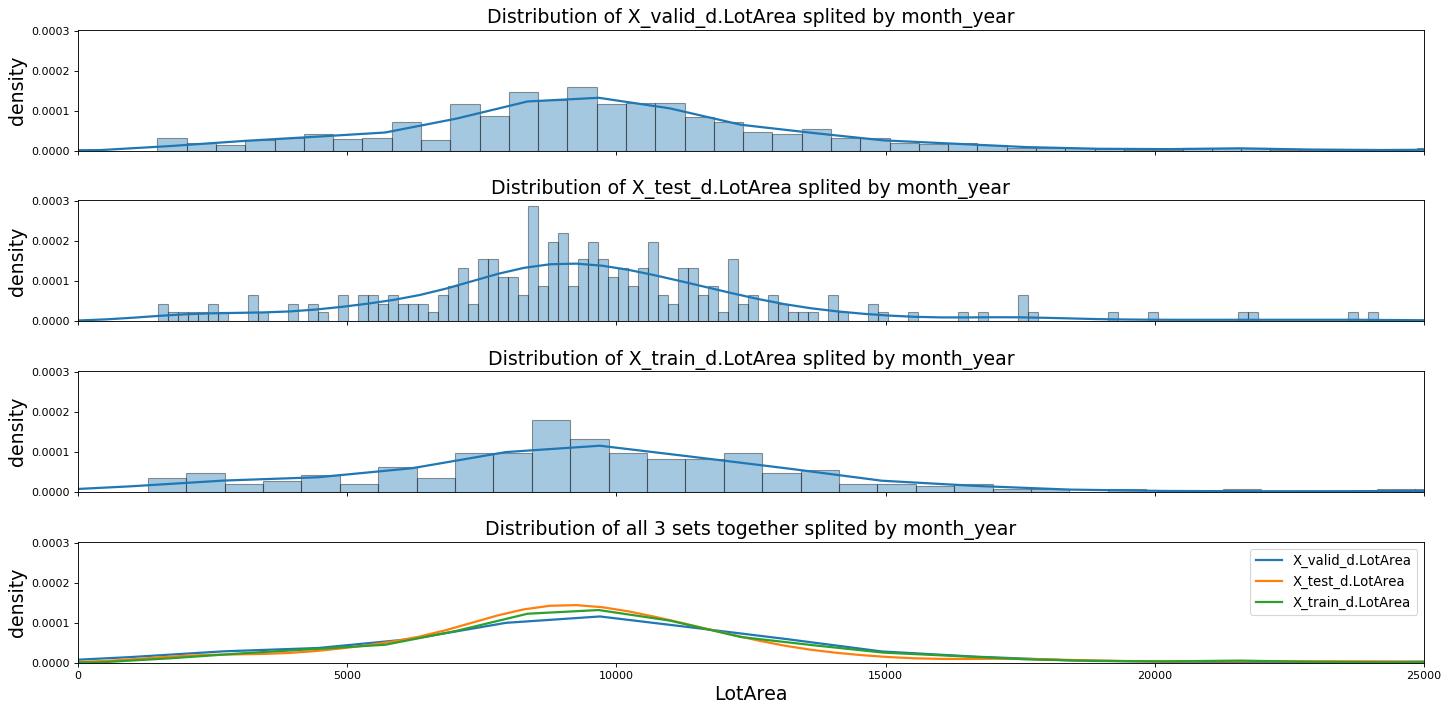

In [753]:
f = plt.figure(figsize=(18,9), dpi= 80)

ax1 = plt.subplot(411)
sns.distplot(X_train_d.LotArea, hist=True, kde=True, 
             bins=int(300),
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})


ax2 = plt.subplot(412, sharex=ax1, sharey=ax1 )
sns.distplot(X_test_d.LotArea, hist=True, kde=True, 
             bins=int(300),
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})


ax3 = plt.subplot(413,  sharex=ax1, sharey=ax1)
sns.distplot(X_valid_d.LotArea, hist=True, kde=True, 
             bins=int(300), 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})


ax4 = plt.subplot(414,  sharex=ax1, sharey=ax1) 
for i,x in zip([X_valid_d.LotArea,X_test_d.LotArea,X_train_d.LotArea], \
               ['X_valid_d.LotArea','X_test_d.LotArea','X_train_d.LotArea']):
    sns.distplot(i, hist=False, kde=True, 
                 bins=int(300),
                 hist_kws={'edgecolor':'black'},
                 kde_kws={'linewidth': 2}, label=x)
ax4.legend(loc="upper right",fontsize=12)
    
for ax, name in zip((ax1,ax2,ax3,ax4), \
                    ['X_valid_d.LotArea','X_test_d.LotArea','X_train_d.LotArea','all 3 sets together']):
    ax.set(xlabel='LotArea', ylabel='density')
    ax.label_outer()
    ax.xaxis.label.set_size(17)
    ax.yaxis.label.set_size(17)
    ax.set_title(str("Distribution of " + name + " splited by " + 'month_year'),fontsize=17)
    f.tight_layout(h_pad=2, w_pad=2) 
    sns.color_palette('husl')
xmin = 0
xmax = 25000
plt.xlim(xmin, xmax)
  
plt.show()

We see that our data has a lot of outliyers, so we made x axes less, to see better picture of distribution

Now let's plot the randomly splited dataset

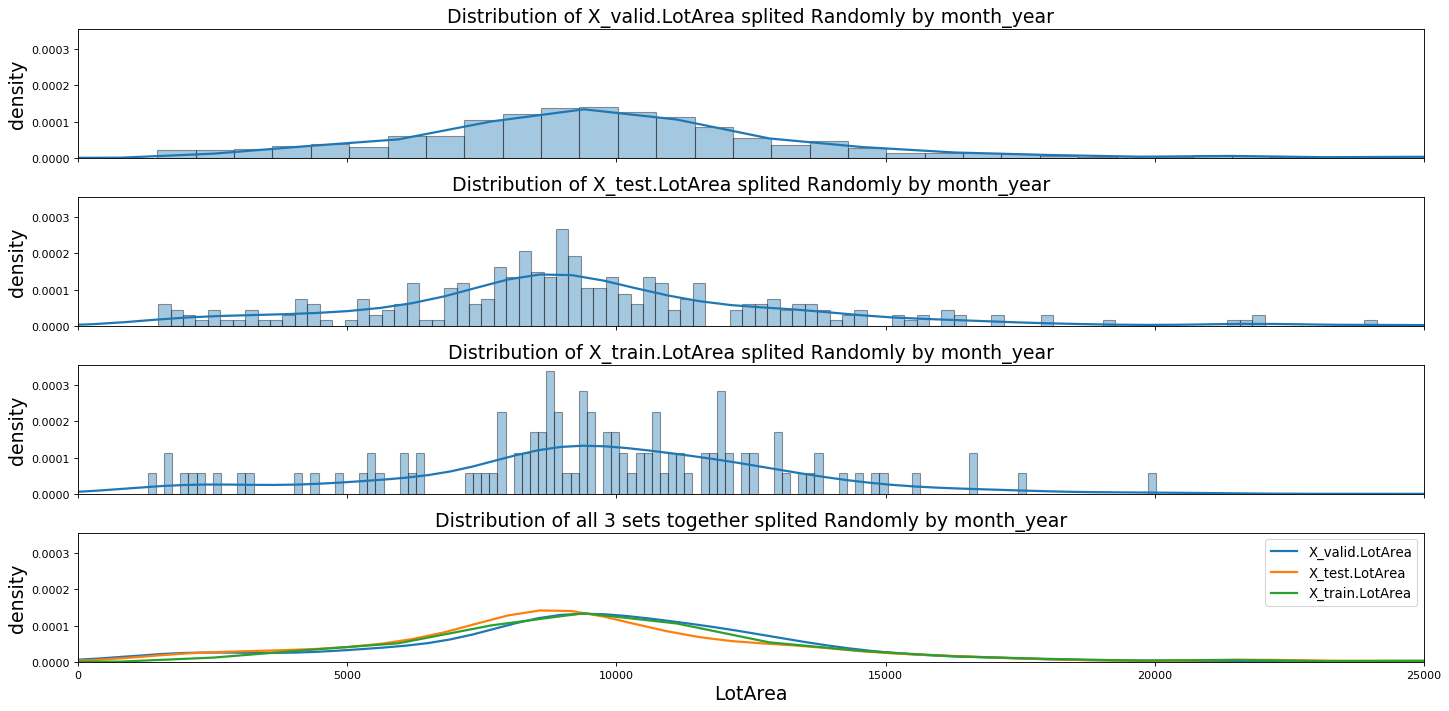

In [754]:
f2 = plt.figure(figsize=(18,9), dpi= 80)

ax_1 = plt.subplot(411)
sns.distplot(X_train.LotArea, hist=True, kde=True, 
             bins=int(300),
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})


ax_2 = plt.subplot(412, sharex=ax_1, sharey=ax_1 )
sns.distplot(X_test.LotArea, hist=True, kde=True, 
             bins=int(300),
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})


ax_3 = plt.subplot(413,  sharex=ax_1, sharey=ax_1)
sns.distplot(X_valid.LotArea, hist=True, kde=True, 
             bins=int(300), 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})


ax_4 = plt.subplot(414,  sharex=ax_1, sharey=ax_1) 
for i,x in zip([X_valid.LotArea,X_test.LotArea,X_train.LotArea], \
               ['X_valid.LotArea','X_test.LotArea','X_train.LotArea']):
    sns.distplot(i, hist=False, kde=True, 
                 bins=int(300),
                 hist_kws={'edgecolor':'black'},
                 kde_kws={'linewidth': 2}, label=x)
ax_4.legend(loc="upper right",fontsize=12)
    
for ax, name in zip((ax_1,ax_2,ax_3,ax_4), \
                    ['X_valid.LotArea','X_test.LotArea','X_train.LotArea','all 3 sets together']):
    ax.set(xlabel='LotArea', ylabel='density')
    ax.label_outer()
    ax.xaxis.label.set_size(17)
    ax.yaxis.label.set_size(17)
    ax.set_title(str("Distribution of " + name + " splited Randomly by " + 'month_year'),fontsize=17)
    f2.tight_layout(h_pad=1, w_pad=2) 
    sns.color_palette('husl')
plt.xlim(xmin, xmax) 
plt.show()

It is visible, that the distribution almost the same as on the previouse plot

##### 2. Plot the distribution for the `Exterior1st` feature. Are there any categories that do not appear in all datasets?


Text(0.5, 1.0, ' The distribution for the `Exterior1st` feature')

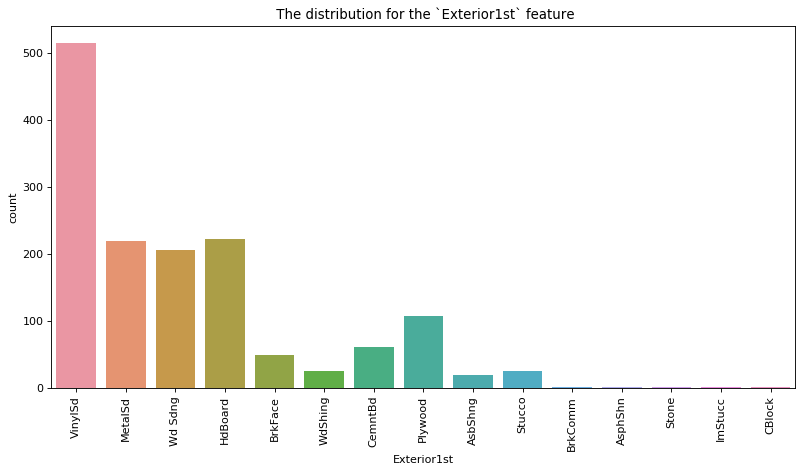

In [755]:
plt.figure(figsize=(12,6), dpi= 80)
sns.countplot(relevant_df.Exterior1st)
plt.xticks(rotation=90) 
plt.title(' The distribution for the `Exterior1st` feature')

In [758]:
df.Exterior1st.isna().sum()

0

We see  from description that on this plot categories 'Other' and 'PreCast'  are missimg

##### 3. Make sure that your division went as expected (shape, distribution of the variable that you split according to).

The pecentage of splitting i made earlier, so let's check in othe way

Tne check  of validity of our split by month+year:


In [595]:
print('the proportion of splitting',(X_train_d.shape[0]/len(relevant_df), X_test_d.shape[0]/len(relevant_df),X_valid_d.shape[0]/len(relevant_df)))
print((X_train_d.month_year.min(), X_train_d.month_year.max()))
print(X_test_d.month_year.min(), X_test_d.month_year.max())
print('len of  train, test and valid sets',len(X_train_d),len(X_test_d),len(X_valid_d))

the proportion of splitting (0.6952054794520548, 0.16643835616438357, 0.13835616438356163)
(Timestamp('2006-01-01 00:00:00'), Timestamp('2009-05-01 00:00:00'))
2009-09-01 00:00:00 2010-07-01 00:00:00
len of  train, test and valid sets 1015 243 202


The check  of validity of our random split :


In [596]:
print('the proportion of splitting',(X_train.shape[0]/len(relevant_df), X_test.shape[0]/len(relevant_df),X_valid.shape[0]/len(relevant_df)))
print(set(X_train.index) & set(X_test.index))
print('len of  train, test and valid sets',len(X_train),len(X_test),len(X_valid))

the proportion of splitting (0.7198630136986301, 0.2, 0.08013698630136987)
set()
len of  train, test and valid sets 1051 292 117


everything is fine

# Given Dataset - Titanic

Download the file from http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic3.xls, and read it as a pandas dataframe.

Column description:
- survival: Survival (0 = no; 1 = yes)
- pclass: Passenger class (1 = first; 2 = second; 3 = third)
- name: Name
- sex: Sex
- age: Age
- sibsp: Number of siblings/spouses aboard
- parch: Number of parents/children aboard
- ticket: Ticket number
- fare: Passenger fare
- cabin: Cabin
- embarked: Port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
- boat: Lifeboat (if survived)
- body: Body number (if did not survive and body was recovered)



In [597]:
data = pd.read_excel('http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic3.xls')
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"



## Q3

#### Split the dataset into a Train set, Test set and a Validation set:

We will split our data set in random way

In [598]:
features = ['pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest']
target = 'survived'
rel_data = data[features + [target]].drop_duplicates()

##### 1. Stratified by `sex`


In [601]:
X = rel_data[features]
y = rel_data[target]

X_main, X_test, y_main, y_test = train_test_split(X, y, test_size=0.2,random_state=42,stratify = X['sex'])
X_train, X_valid, y_train, y_valid = train_test_split(X_main, y_main, test_size=0.10,random_state=42, \
                                                      stratify = X_main['sex'])
print('Splited  dataset into a 3 sets  Randomly :',
      '\nTrain set is:', round(len(X_train)/len(data),1), '%'\
      '\nTest set is:', round(len(X_test)/len(data), 1), '%'\
     '\nValidation set is: ', round(len(X_valid)/len(data), 1), '%')

Splited  dataset into a 3 sets  Randomly : 
Train set is: 0.7 %
Test set is: 0.2 %
Validation set is:  0.1 %


Let's plot it

Text(0.5, 1.0, 'X_valid  Stratified by `sex`')

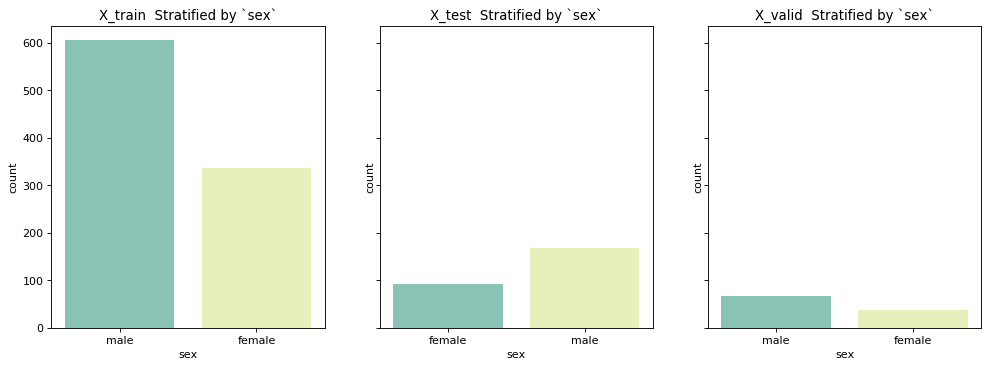

In [625]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True,figsize=(15,5), dpi= 80)
sns.countplot(x=X_train.sex,data=X_train, ax=ax1, palette= ["#7fcdbb","#edf8b1"])
sns.countplot(x=X_test.sex,data=X_test, ax=ax2,palette= ["#7fcdbb","#edf8b1"])
sns.countplot(x=X_valid.sex,data=X_valid, ax=ax3,palette= ["#7fcdbb","#edf8b1"])
ax1.set_title('X_train  Stratified by `sex`')
ax2.set_title('X_test  Stratified by `sex`')
ax3.set_title('X_valid  Stratified by `sex`')

On the plot we also able to see that pecentage of spliting by sex feature is equal in each set

##### 2. By group - `pclass` 


In [736]:
train_main_inds, test_inds = next(GroupShuffleSplit(test_size=.20, n_splits=2, random_state = 7). \
                                   split(rel_data, groups=rel_data['pclass']))

train_set = rel_data.iloc[train_main_inds]
test_set = rel_data.iloc[test_inds]

train_inds, valid_inds = next(GroupShuffleSplit(train_size=.70, n_splits=2, random_state = 7).split(train_set, groups=train_set['pclass']))

train_set = rel_data.iloc[train_inds]
valid_set = rel_data.iloc[valid_inds]

print("Splited dataset by pclass into  \nTrain set: {}\nTest set: {}\nValidation set: {}\n". \
      format(train_set.pclass.unique()[0], test_set.pclass.unique()[0], valid_set.pclass.unique()[0]))

Splited dataset by pclass into  
Train set: 2
Test set: 3
Validation set: 1



##### 3. Which division is better? Can you offer another division that would work?

Well the important thing is that how well the training, testing and validation data sets describe the feature space...If number of points in the whole data set is large then any division may work fine but when the data set is limited, division ratio may play a crucial role

I think its depend on the size of the data set, if its balance or not ,depends on the business problem and also depends on the main problem needs to built many samples that is mean we should increase the training. 



## Q4

#### Explore your divisions (answer per dataset and per division):

##### 1. Plot the `age` distribution for the three datasets, for both divisions. What can you say about the distribution?


Let's plot the age distribution grouped by feature 'pclass'

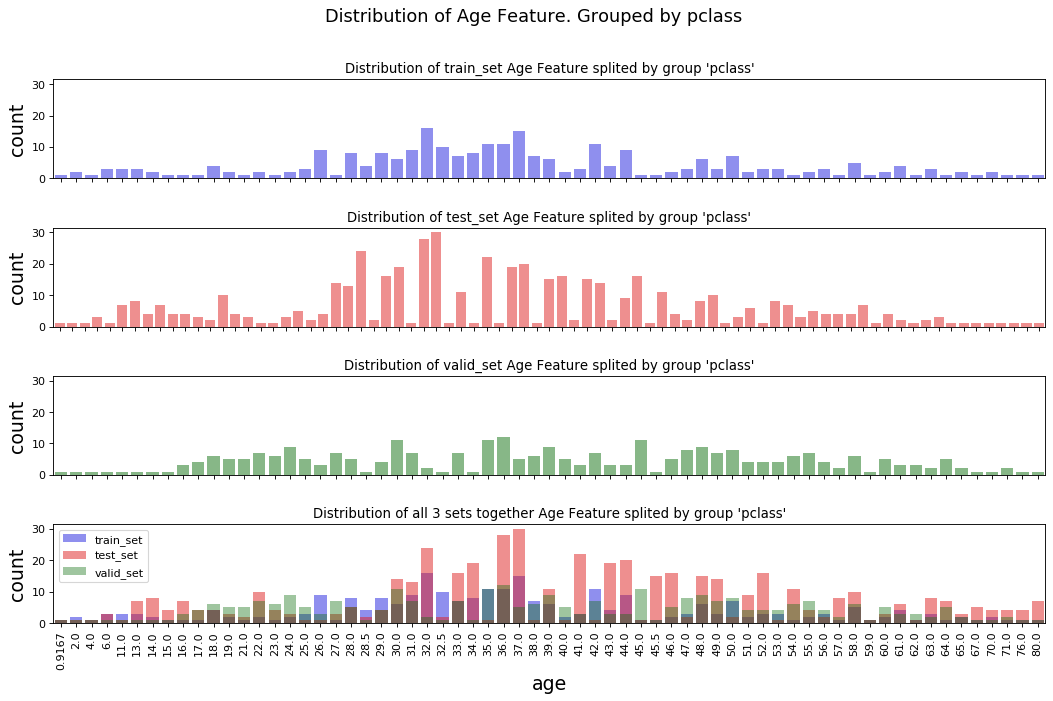

In [730]:
f_pclass = plt.figure(figsize=(16,9), dpi= 80)

ax1 = plt.subplot(411)
sns.countplot(train_set.age,   color = 'blue', alpha = 0.5)

ax2 = plt.subplot(412, sharey =ax1)
sns.countplot(test_set.age,   color = 'red', alpha = 0.5)

ax3 = plt.subplot(413, sharey =ax1)
sns.countplot(valid_set.age, color = 'green', alpha = 0.5)

ax4 = plt.subplot(414, sharey =ax1) 
sns.countplot(train_set.age,   color = 'blue', alpha = 0.5,label='train_set')
sns.countplot(test_set.age,  color = 'red', alpha = 0.5,label='test_set')
sns.countplot(valid_set.age,   color = 'green', alpha = 0.4,label='valid_set')
ax4.legend(loc="upper left",fontsize=10)

for ax, name in zip((ax1,ax2,ax3,ax4), \
                    ['train_set','test_set','valid_set','all 3 sets together']):
    ax.set(xlabel='age', ylabel='count')
    ax.label_outer()
    ax.xaxis.label.set_size(17)
    ax.yaxis.label.set_size(17)
    ax.set_title(str("Distribution of " + name + " Age Feature splited by group 'pclass'"),fontsize=12)
    plt.subplots_adjust(hspace=0.5)
    plt.xticks(rotation=90)
f_pclass.suptitle('Distribution of Age Feature. Grouped by pclass', fontsize=16)

plt.show()

Well, looking on this plot, we can say that the grouped by 'pclass' train set looks very similar to the valid set, but there are a small difference



And now we will plot the stratified set

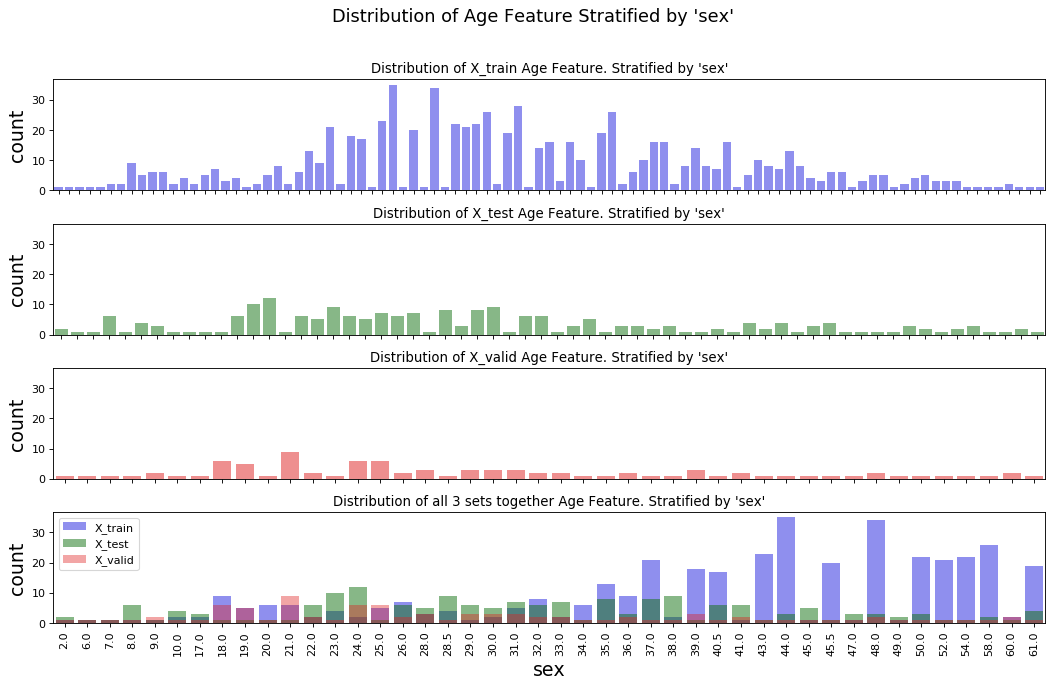

In [731]:
f_sex = plt.figure(figsize=(16,9), dpi= 80)

ax1 = plt.subplot(411)
sns.countplot(X_train.age,   color = 'blue', alpha = 0.5)

ax2 = plt.subplot(412, sharey =ax1)
sns.countplot(X_test.age,   color = 'green', alpha = 0.5)

ax3 = plt.subplot(413, sharey =ax1)
sns.countplot(X_valid.age, color = 'red', alpha = 0.5)

ax4 = plt.subplot(414, sharey =ax1) 
sns.countplot(X_train.age,   color = 'blue', alpha = 0.5, label='X_train')
sns.countplot(X_test.age,  color = 'green', alpha = 0.5, label='X_test')
sns.countplot(X_valid.age,   color = 'red', alpha = 0.4, label='X_valid')
ax4.legend(loc="upper left",fontsize=10)

for ax, name in zip((ax1,ax2,ax3,ax4), \
                    ['X_train','X_test','X_valid','all 3 sets together']):
    ax.set(xlabel='sex', ylabel='count')
    ax.label_outer()
    ax.xaxis.label.set_size(17)
    ax.yaxis.label.set_size(17)
    ax.set_title(str("Distribution of " + name + " Age Feature. Stratified by 'sex'"),fontsize=12)
    plt.subplots_adjust(hspace=0.3)
    plt.xticks(rotation=90)
f_sex.suptitle("Distribution of Age Feature Stratified by 'sex'", fontsize=16)
plt.show()

##### 2. Plot the distribution for the `embarked` feature.
 

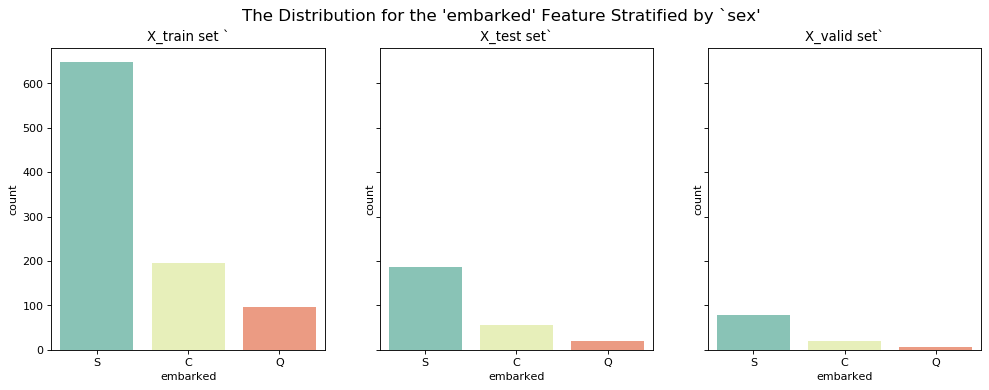

In [732]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True,figsize=(15,5), dpi= 80)
sns.countplot(x=X_train.embarked,data=X_train, ax=ax1, palette= ["#7fcdbb","#edf8b1","#fc9272"])
sns.countplot(x=X_test.embarked,data=X_test, ax=ax2,palette= ["#7fcdbb","#edf8b1","#fc9272"])
sns.countplot(x=X_valid.embarked,data=X_valid, ax=ax3,palette= ["#7fcdbb","#edf8b1","#fc9272"])
ax1.set_title('X_train set `')
ax2.set_title('X_test set`')
ax3.set_title('X_valid set`')
fig.suptitle("The Distribution for the 'embarked' Feature Stratified by `sex'", fontsize=15)
plt.show()

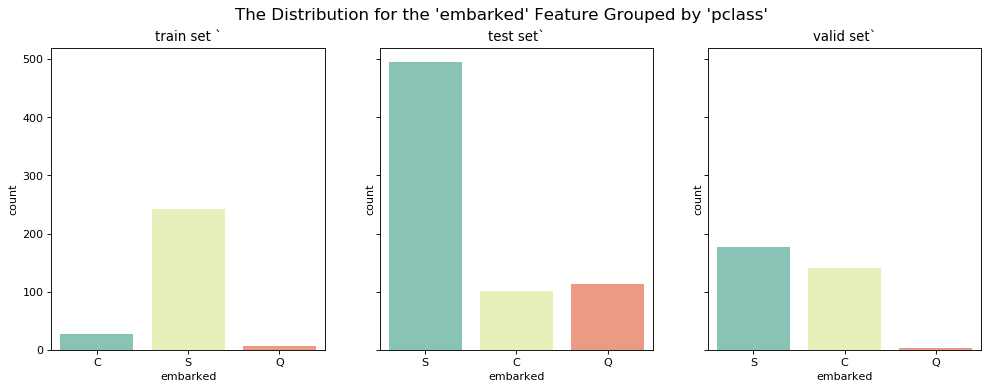

In [733]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True,figsize=(15,5), dpi= 80)
sns.countplot(x=train_set.embarked,data=X_train, ax=ax1, palette= ["#7fcdbb","#edf8b1","#fc9272"])
sns.countplot(x=test_set.embarked,data=X_test, ax=ax2,palette= ["#7fcdbb","#edf8b1","#fc9272"])
sns.countplot(x=valid_set.embarked,data=X_valid, ax=ax3,palette= ["#7fcdbb","#edf8b1","#fc9272"])
ax1.set_title('train set `')
ax2.set_title('test set`')
ax3.set_title('valid set`')
fig.suptitle("The Distribution for the 'embarked' Feature Grouped by 'pclass'", fontsize=15)
plt.show()

#### Are there any categories that do not appear in all datasets?

In [744]:
data[data.embarked.isnull()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
168,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,6,NaN,NaN
284,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,6,NaN,"Cincinatti, OH"


In [ ]:
Yes, there are 2 ladies passangers

##### 3. Make sure that your division went as expected (shape, distribution of the variable that you split according to).

The proportion of male/female in the sets splited by sex:

In [734]:
percent_train = len(X_train[X_train.sex =='female'])/len(X_train[X_train.sex =='male']*100)
percent_test = len(X_test[X_test.sex == 'female'])/len(X_test[X_test.sex =='male']*100)
percent_valid = len(X_valid[X_valid.sex =='female'])/len(X_valid[X_valid.sex =='male']*100)

print("The proportion female/male in sets stratifiered by sex:\nTrain is : {}%\nTest is : {}%\nValidation is : {}%"\
      .format(round(percent_test,2),round(percent_train,2),round(percent_valid,2)))


The proportion female/male in sets stratifiered by sex:
Train is : 0.55%
Test is : 0.55%
Validation is : 0.54%


In [735]:
X_train.shape[0], X_test.shape[0], X_valid.shape[0]

(942, 262, 105)

Everything is fine and equal



Let's check the shape of sets splited by group


In [737]:
train_set.shape[0], test_set.shape[0], valid_set.shape[0]

(277, 709, 323)

there is something wrong with spliting by group